In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy
from scipy import stats
import math

from sqlalchemy import create_engine

import matplotlib.dates as mdates
from functools import lru_cache
#import warnings
#warnings.filterwarnings('ignore')
#import os
#print(os.listdir("../"))

In [3]:
username = "DublinBikesApp"
password = "dublinbikesapp"
endpoint = "dublinbikesapp.cynvsd3ef0ri.us-east-1.rds.amazonaws.com"
port = "3306"
db = "DublinBikesApp"

engine = create_engine("mysql+mysqlconnector://{}:{}@{}:{}/{}".format(username, password, endpoint, port, db), echo=True)

In [4]:
n= 50

sql= f"""
SELECT * FROM DublinBikesApp.dynamicData
where number = {n} and mod(Insert_ID, 12) = 0
group by last_update
order by number, last_update asc;
"""



print(sql)


SELECT * FROM DublinBikesApp.dynamicData
where number = 50 and mod(Insert_ID, 12) = 0
group by last_update
order by number, last_update asc;



In [5]:
df = pd.read_sql_query(sql, engine)

2021-04-14 10:22:53,875 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-04-14 10:22:53,875 INFO sqlalchemy.engine.base.Engine {}
2021-04-14 10:22:54,150 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-04-14 10:22:54,151 INFO sqlalchemy.engine.base.Engine {}
2021-04-14 10:22:54,686 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-04-14 10:22:54,686 INFO sqlalchemy.engine.base.Engine {}
2021-04-14 10:22:55,227 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-04-14 10:22:55,227 INFO sqlalchemy.engine.base.Engine {}
2021-04-14 10:22:55,493 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-04-14 10:22:55,493 INFO sqlalchemy.engine.base.Engine {}
2021-04-14 10:22:55,854 INFO sqlalchemy.engine.base.OptionEngine 
SELECT * FROM DublinBikesApp.dynamicData
where number = 50 and mod(Insert_ID, 12) = 0
group by last_update
order by numbe

In [6]:
#Print the first and the last 5 rows.
df.head(5).append(df.tail(5))

,Insert_ID,number,bike_stands,available_bike_stands,available_bikes,last_update,weather,temp
0,0,50,40,11,29,2021-03-01 01:03:05,Fog,2.90
1,12,50,40,11,29,2021-03-01 02:03:57,Fog,2.54
2,24,50,40,11,29,2021-03-01 03:04:47,Fog,2.74
3,36,50,40,11,29,2021-03-01 04:05:39,Fog,3.09
4,48,50,40,11,29,2021-03-01 05:10:48,Fog,3.37
1017,12204,50,40,34,6,2021-04-12 13:15:32,Clouds,8.34
1018,12216,50,40,31,9,2021-04-12 14:13:38,Clouds,8.01
1019,12228,50,40,29,11,2021-04-12 15:14:44,Clouds,7.39
1020,12240,50,40,29,11,2021-04-12 16:06:33,Clouds,7.20
1021,12252,50,40,26,14,2021-04-12 17:09:44,Rain,7.56


In [7]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace(' ', '_')
df.shape

(1022, 8)

In [8]:
df.dtypes

Insert_ID                         int64
number                            int64
bike_stands                       int64
available_bike_stands             int64
available_bikes                   int64
last_update              datetime64[ns]
weather                          object
temp                            float64
dtype: object

In [9]:
df["last_update"] = pd.to_datetime(df["last_update"])

In [10]:
df["day"] = df["last_update"].dt.dayofweek
df["hour"] = df["last_update"].dt.hour
df["month"] = df["last_update"].dt.month
df=df.drop(["last_update"], axis=1)

In [11]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('available_bikes')) #Remove b from list
df = df[cols+['available_bikes']] #Create new dataframe with columns in the order you want
df

,Insert_ID,number,bike_stands,available_bike_stands,weather,temp,day,hour,month,available_bikes
0,0,50,40,11,Fog,2.90,0,1,3,29
1,12,50,40,11,Fog,2.54,0,2,3,29
2,24,50,40,11,Fog,2.74,0,3,3,29
3,36,50,40,11,Fog,3.09,0,4,3,29
4,48,50,40,11,Fog,3.37,0,5,3,29
...,...,...,...,...,...,...,...,...,...,...
1017,12204,50,40,34,Clouds,8.34,0,13,4,6
1018,12216,50,40,31,Clouds,8.01,0,14,4,9
1019,12228,50,40,29,Clouds,7.39,0,15,4,11
1020,12240,50,40,29,Clouds,7.20,0,16,4,11


In [12]:
df['month']=df.month.astype('category')
df['day']=df.day.astype('category')
df['hour']=df.hour.astype('category')
df['weather']=df.weather.astype('category')

In [13]:
df.dtypes

Insert_ID                   int64
number                      int64
bike_stands                 int64
available_bike_stands       int64
weather                  category
temp                      float64
day                      category
hour                     category
month                    category
available_bikes             int64
dtype: object

In [14]:
df.describe()

,Insert_ID,number,bike_stands,available_bike_stands,temp,available_bikes
count,1022.000000,1022.0,1022.0,1022.000000,1022.000000,1022.000000
mean,6126.000000,50.0,40.0,25.384540,7.173474,14.549902
std,3542.043478,0.0,0.0,7.968835,3.497582,7.976395
min,0.000000,50.0,40.0,1.000000,-2.350000,0.000000
25%,3063.000000,50.0,40.0,19.000000,4.730000,9.000000
50%,6126.000000,50.0,40.0,26.000000,7.340000,14.000000
75%,9189.000000,50.0,40.0,31.000000,9.417500,20.750000
max,12252.000000,50.0,40.0,40.000000,16.510000,39.000000


In [15]:
df.isnull().sum()

Insert_ID                0
number                   0
bike_stands              0
available_bike_stands    0
weather                  0
temp                     0
day                      0
hour                     0
month                    0
available_bikes          0
dtype: int64

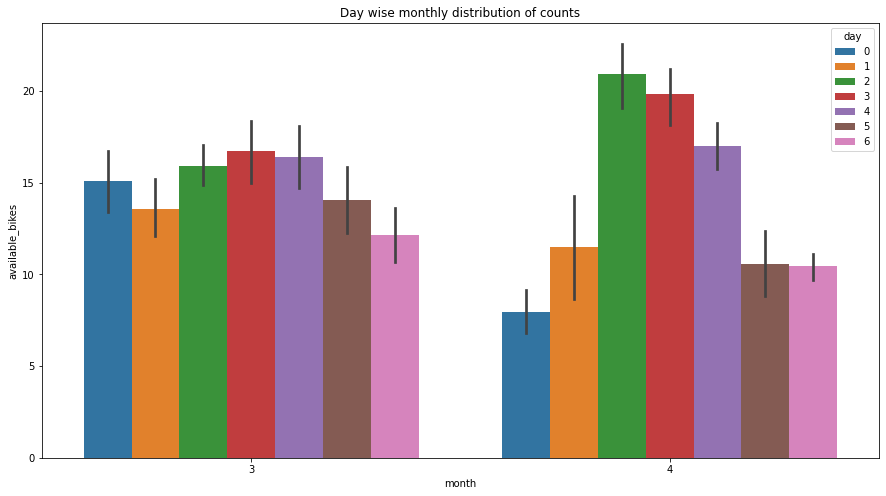

In [16]:
#fig,ax=plt.subplots(figsize=(15,8))
#sns.set_style('white')
#Bar plot for monthly distribution of counts
#sns.barplot(x='month',y='available_bike',data=df[['month','available_bike','season']],hue='season',ax=ax)
#ax.set_title('Seasonwise monthly distribution of counts')
#plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='available_bikes',data=df[['month','available_bikes','day']],hue='day',ax=ax1)
ax1.set_title('Day wise monthly distribution of counts')
plt.show()

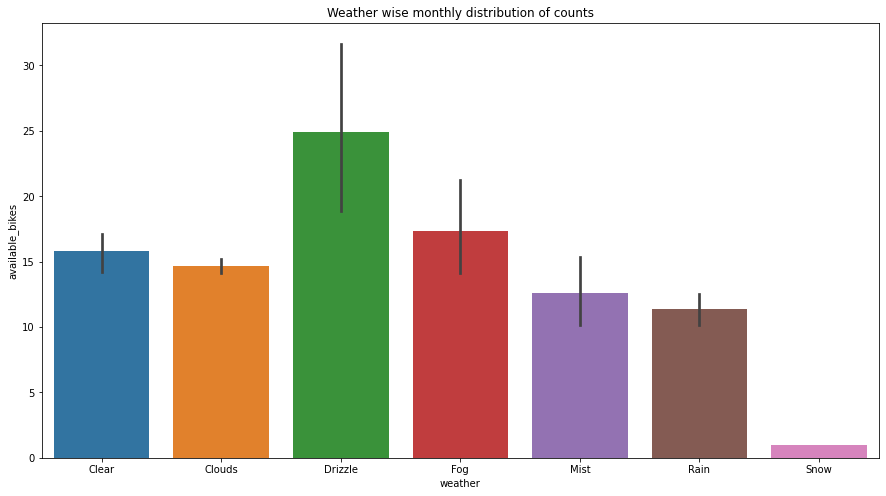

In [17]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather',y='available_bikes',data=df[['month','available_bikes','weather']],ax=ax1)
ax1.set_title('Weather wise monthly distribution of counts')
plt.show()

From the above bar plot, we can observed a distinction between clear/misty day and all other conditions. The use of bike rental is highest during clear day, then second highest during mist days. All other weathers, including clouds, are impacting the use of bikes.

## Outliers

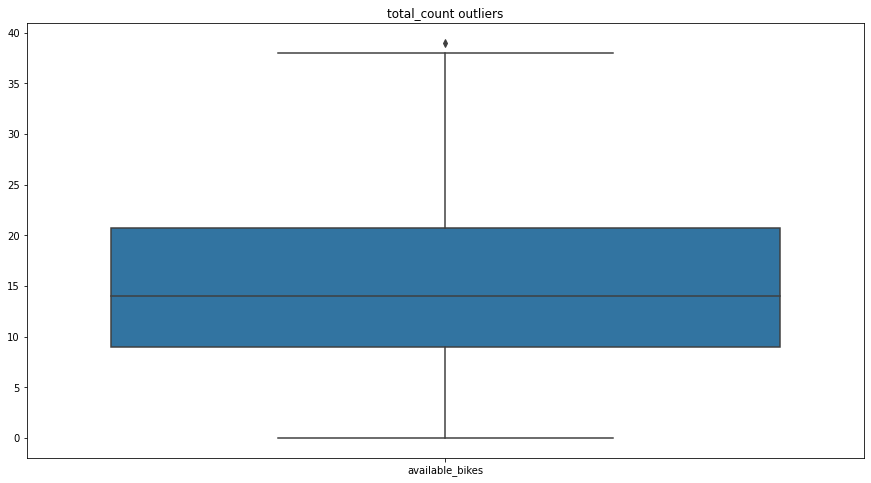

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['available_bikes']])
ax.set_title('total_count outliers')
plt.show()

From the box plot, we can observed that no outliers are present in the available_bikes.

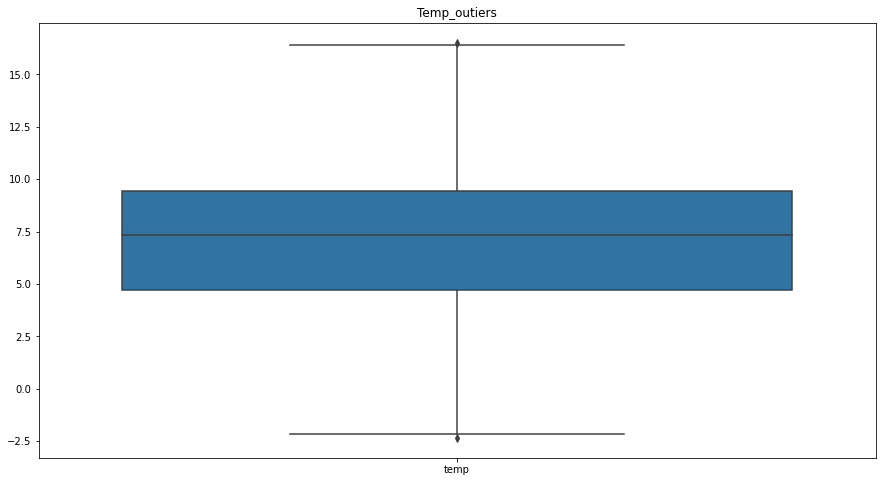

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp']])
ax.set_title('Temp_outiers')
plt.show()

From the box plot, we can observed that no outliers are present in temp.

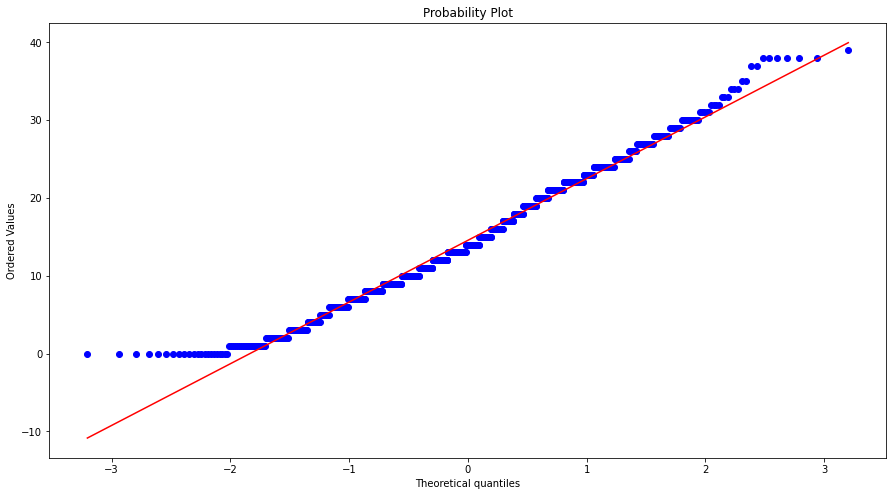

In [20]:
fig=plt.figure(figsize=(15,8))
stats.probplot(df.available_bikes.tolist(),dist='norm',plot=plt)
plt.show()

In [21]:
#correMtr=df[["temp","available_bikes"]].corr()
#mask=np.array(correMtr)
#mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
#fig,ax=plt.subplots(figsize=(15,8))
#sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
#ax.set_title('Correlation matrix of attributes')
#plt.show()

## Modelling

In [22]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [23]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(715, 10) (307, 10) (715, 2) (307, 2)
   index  available_bikes
0    227                8
1    874                9
2    359               38
3    814               10
4    177               16
   index  available_bikes
0    992               11
1    478               12
2    689                3
3     31               12
4    617               13


In [24]:
#Create a new dataset for train attributes
train_attributes=X_train[['month','day','hour','weather','temp']]
#Create a new dataset for test attributes
test_attributes=X_test[['month','day','hour','weather','temp']]
#categorical attributes
cat_attributes=['weather']
#numerical attributes
num_attributes=['month','day','hour','temp']

In [25]:
#Decoding the training attributes
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (715, 11)


,month,day,hour,temp,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Mist,weather_Rain,weather_Snow
0,3,2,12,11.37,0,0,0,0,0,1,0
1,4,1,13,6.63,0,0,0,0,0,1,0
2,3,1,1,9.62,0,1,0,0,0,0,0
3,4,6,1,2.60,0,1,0,0,0,0,0
4,3,0,10,8.42,0,1,0,0,0,0,0


In [26]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.available_bikes.values

In [27]:
#training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [28]:
#fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

In [29]:
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.16605440911509217
Model coefficients : [ -2.90471783  -0.53047502  -0.04669089  -0.89862984   2.18787785
   3.25856467  14.10480113  -1.19361495  -3.09295655   0.05673333
 -15.32140548]
Model intercept value : 29.777094537863874


In [30]:
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 9.11139592, 10.8825444 , 13.93775875, 16.0468069 , 14.96323048,
       14.40612862, 11.23444441, 11.77096636, 14.6358741 ,  9.29424488,
       17.74221967, 13.58637493, 16.43605536, 13.10937213, 18.65561946,
        7.96066517, 12.38768917, 14.35623125, 15.50788302, 16.84734345,
       15.50893768, 11.91059698, 15.37015987, 12.21715134, 13.75564006,
       14.23117945, 14.32700625, 18.91871685,  8.65847129, 12.44813766,
       11.89769475, 13.56690621, 18.55770906, 19.96915516, 11.81432227,
       12.37122006, 14.54610439, 17.61927319, 13.52826846, 18.0034316 ,
       12.73673276, 14.37506903, 12.79513091, 16.50046371, 18.99172721,
       16.14804718,  9.40118497, 17.48469402, 16.77008873, 15.21660349,
       18.82297951, 10.27409422, 14.76940658, 15.43169393, 12.93684662,
       17.7024954 , 18.65957424, 10.32775844, 11.19234817, 16.25342433,
       10.30000111, 16.60137961, 19.63498964, 10.23851395, 28.2917383 ,
       14.33473885, 14.03358282, 17.52197558, 17.7648552 , 14.66

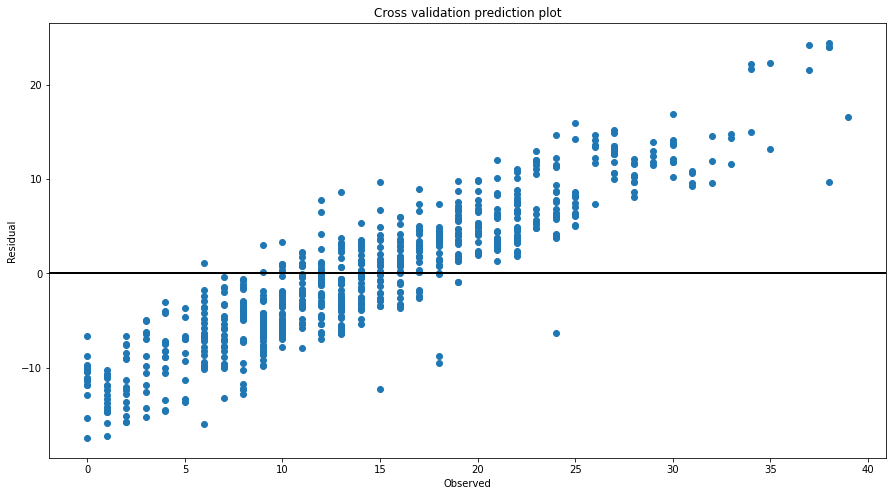

In [31]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [32]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.1221213076392436


In [33]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (307, 11)


,month,day,hour,temp,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Mist,weather_Rain,weather_Snow
0,4,6,12,6.08,0,1,0,0,0,0,0
1,3,6,0,8.42,0,1,0,0,0,0,0
2,3,0,20,12.07,0,1,0,0,0,0,0
3,3,1,8,0.84,0,0,0,1,0,0,0
4,3,4,20,3.49,0,1,0,0,0,0,0


In [34]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.available_bikes.values

In [35]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred

array([12.20997773, 13.57219239, 12.54122585, 18.21047492, 18.12956977,
       11.1338958 , 17.59566893,  9.69419282, 19.55810667,  7.74302703,
       13.62011217, 18.27762548, 14.73299632, 18.33392728, 19.03190771,
       10.45960369, 15.77625694, 14.35114361, 13.22314384, 11.91632949,
       17.34524514, 12.32988199, 17.55297069, 12.62015382, 16.52482345,
       13.74981665, 14.97918013, 12.73212312, 18.10926328, 11.63699809,
       15.30963036, 13.11354886, 18.15846971, 15.4598241 , 13.36701441,
       12.55544747, 10.9890712 , 11.48702998, 25.11744773, 15.50956105,
       11.87481615, 17.52311762,  6.4067777 , 12.18529271, 11.31016187,
       13.66928228, 17.5487833 , 17.01498423, 18.14650168, 17.65772277,
       17.08772487, 16.41745518, 11.4691838 ,  8.35313808, 16.23603414,
       10.78855135, 13.99292056, 11.91771137,  9.59676605, 17.23103403,
       12.0615797 , 18.67478089, 16.79475471, 13.23137511, 15.89549915,
       19.17376824, 16.68943468, 13.78880902, 12.52937769, 17.11

In [36]:

#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 7.192363702547788
Mean absolute error : 5.930120612194681


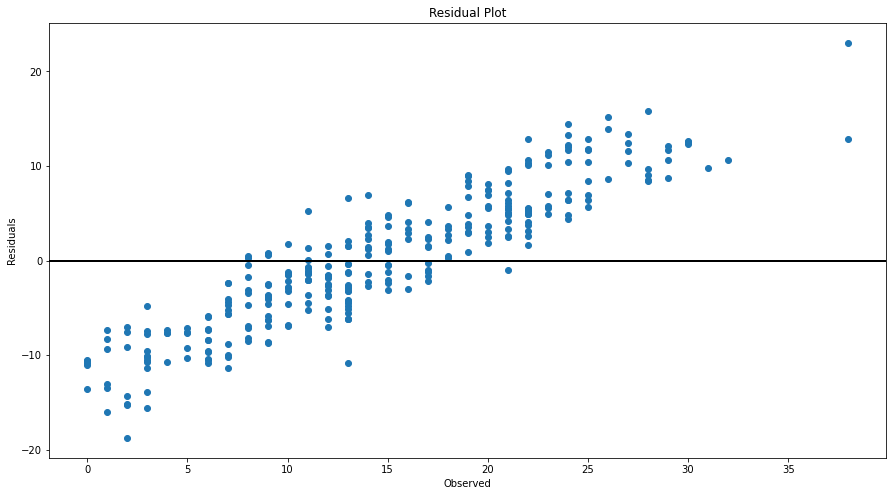

In [37]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

### Decision tree regressor

In [38]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [39]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [40]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.3269438977571233


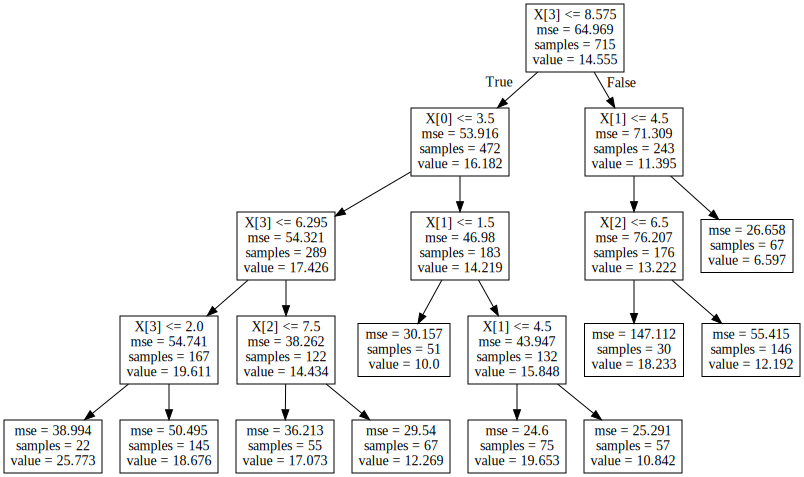

In [41]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [42]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([12.15789474,  8.94285714, 12.15789474,  9.55172414, 12.375     ,
        9.55172414, 12.15789474,  6.8       , 12.15789474,  9.55172414,
       12.375     , 16.06818182, 17.92481203, 12.15789474,  8.94285714,
       12.15789474, 17.92481203, 17.92481203, 20.        ,  8.94285714,
       17.92481203, 17.92481203, 20.        , 12.15789474, 17.92481203,
       17.92481203, 12.15789474, 14.92857143, 12.15789474, 17.92481203,
       17.92481203, 12.15789474, 17.92481203, 28.64285714, 16.06818182,
       12.15789474, 17.92481203, 17.92481203, 12.15789474, 12.375     ,
       12.15789474, 16.06818182, 17.92481203, 16.06818182, 16.06818182,
        8.94285714,  6.8       , 20.        , 16.06818182, 17.92481203,
       14.92857143, 12.15789474, 12.375     ,  9.55172414,  6.8       ,
       20.        , 16.06818182,  6.8       , 12.15789474, 17.92481203,
       12.15789474, 17.92481203, 14.92857143, 12.15789474, 12.15789474,
       17.92481203, 17.92481203, 17.92481203, 16.06818182, 16.06

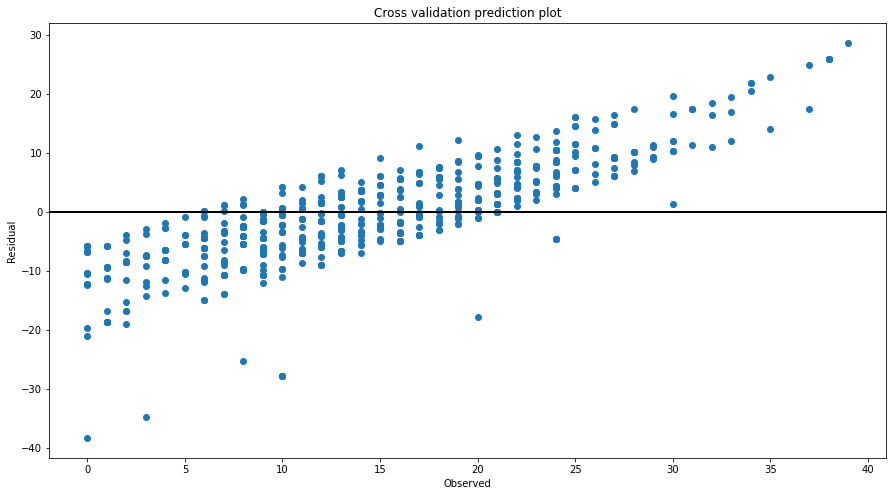

In [43]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [44]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : -0.024444212750295662


#### Decision tree Model performance on test dataset

In [45]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([10.84210526, 17.07272727, 12.19178082, 25.77272727, 18.67586207,
       12.19178082, 18.67586207, 10.84210526, 18.67586207, 10.84210526,
       12.19178082, 18.67586207, 19.65333333, 18.67586207, 18.67586207,
        6.59701493, 18.67586207, 12.26865672, 18.23333333, 12.19178082,
       18.67586207, 19.65333333, 18.67586207, 12.19178082, 17.07272727,
       18.23333333, 18.23333333, 10.        , 19.65333333,  6.59701493,
       18.23333333, 18.23333333, 10.        , 12.19178082, 19.65333333,
       19.65333333, 12.19178082, 12.19178082, 12.19178082, 12.19178082,
       19.65333333, 18.67586207,  6.59701493, 12.19178082,  6.59701493,
       17.07272727, 19.65333333, 18.67586207, 18.67586207, 18.67586207,
       17.07272727, 10.        , 18.67586207, 12.19178082, 18.67586207,
       12.26865672, 12.19178082,  6.59701493, 12.19178082, 18.67586207,
       19.65333333, 18.67586207, 18.67586207,  6.59701493, 17.07272727,
       25.77272727, 18.67586207, 12.19178082, 18.67586207, 18.67

In [46]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 7.341190809373543
Mean absolute error : 5.867796933851644


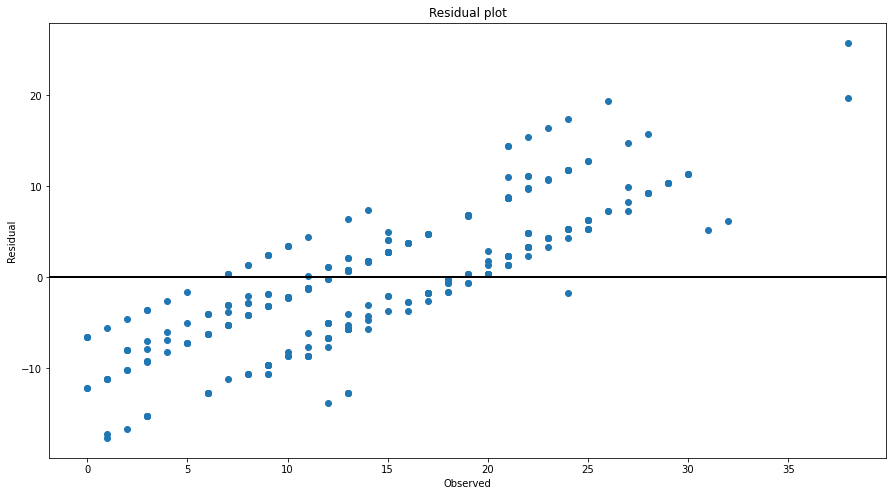

In [47]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

## Random Forest

In [48]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=100)

In [49]:
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9266455987468502


In [51]:
#Cross validation prediction
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([12.57,  9.81,  9.27, 12.23, 16.27, 10.19, 17.71,  7.72, 22.13,
       10.34, 17.37, 11.35, 23.15, 14.08,  7.27,  8.49, 13.67, 15.78,
       15.74, 11.88, 11.64, 12.52, 16.24,  9.07, 19.54, 24.07, 12.71,
       23.22, 15.69, 18.25, 17.38,  8.57, 22.03, 24.19, 12.43,  5.61,
       21.27, 20.2 ,  6.19, 14.98, 10.3 , 14.37, 13.6 , 12.29, 16.4 ,
       12.78,  7.09, 24.95, 13.47, 15.3 , 10.51, 10.66, 13.81, 10.57,
        7.34, 19.16, 21.81, 11.91, 14.34, 15.5 , 13.55, 20.81, 20.82,
       12.89, 23.36, 10.16, 23.83, 18.17, 19.38, 12.12, 14.54, 14.96,
        7.74, 24.13, 13.23, 16.63,  3.4 , 11.46, 12.25, 16.54, 15.37,
       19.21, 15.24, 12.42,  1.6 , 20.61, 20.39, 13.24, 18.78, 16.98,
       18.72,  3.38, 22.08,  8.74, 22.09,  8.4 , 11.59, 13.78, 24.18,
        6.74, 10.34, 16.16, 10.06, 15.68, 13.85,  9.51,  8.64, 11.76,
       12.85, 10.07, 16.45, 17.49, 18.64, 18.17, 19.78,  4.66, 10.17,
       23.86, 20.93, 10.84,  7.71, 10.63,  7.65, 16.13, 17.11, 21.63,
       18.27, 19.73,

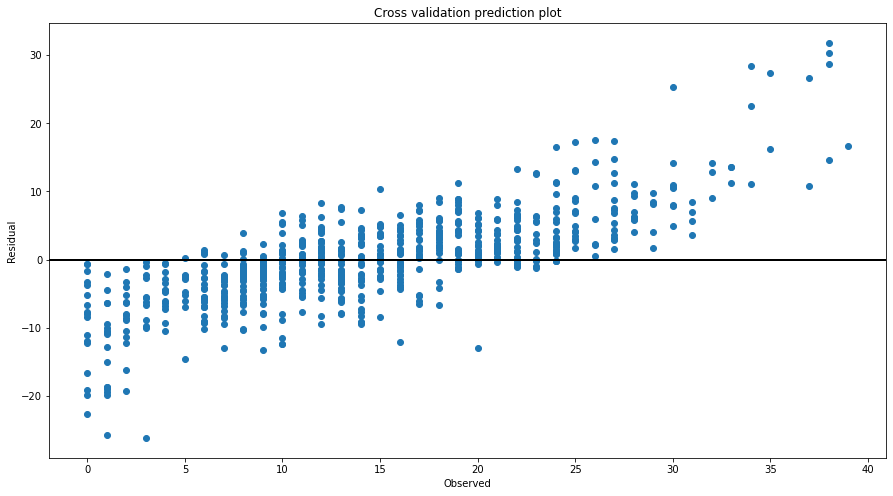

In [52]:
#Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [53]:
#R-squared scores
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.296701440482836


The R-squared or coefficient of determination is 0.85 on average for 3-fold cross validation , it means that predictor is only able to predict 89% of the variance in the target variable which is contributed by independent variables.

### Random Forest Model performance on test dataset

In [54]:
#predict the model
X_test=test_encoded_attributes
print(X_test)
rf_pred=rf.predict(X_test)
rf_score =rf.score(X_train,y_train)
rf_score

    month day hour   temp  weather_Clear  weather_Clouds  weather_Drizzle  \
0       4   6   12   6.08              0               1                0   
1       3   6    0   8.42              0               1                0   
2       3   0   20  12.07              0               1                0   
3       3   1    8   0.84              0               0                0   
4       3   4   20   3.49              0               1                0   
..    ...  ..  ...    ...            ...             ...              ...   
302     3   5   23   5.16              0               1                0   
303     3   1   20   9.22              0               0                0   
304     3   2   17  12.57              0               1                0   
305     3   1   22   7.27              1               0                0   
306     4   5   22   0.91              0               1                0   

     weather_Fog  weather_Mist  weather_Rain  weather_Snow  
0             

0.9266455987468502

In [55]:
print(y_test)
print(rf_pred)

[11 12  3 12 13  2 24  8 28  8  0 28 12 29 12  0 13  6  3  6 30 19 18 16
 22  3 38  8 25  4 18  3 15 15 25 20 11 13 38 11 20 13 13 28 21 12 20  1
 19 21 22  6 13  1 14  3  1 22  2 23 11 17 10 10 13 13 27 15 12 13 17  5
 29 19  7  9 15  4  9 14 12 20  9 21 11 13  3 15 21 10  8  9  8  6 23 24
 23 26 12 21  7 22  7 13 14 21  9 16 11 25  7  9 30 26 22  7 24 21 21 13
 21  9  7 24 20  5 11 17 13 17 12 21 16  5  8 26  0  2 15 10 23  8 25 14
 19  9 19  2 10  6  7 11 31 17 13 28  9 17 16 14 14 10 24  9 13  3  8 14
  9 11 21 22 23 11 17 12 12 14  5 15 22 16  0 13 12  8 12 21  7  6 13 12
  3 19  2 21  8 27 15 25  6 20 24 11 12 22  1 21  8  2 18 24 18 21 24 27
 24  9  6 25 13 15  6  2  3  9 19 10 17 22 25 24 18 23  4 22  7  1 17 19
 22 11 11  3 22 15 15 16 20 29 20 14 10 11 22 22  5  0  6 10 22 14 19 28
 23  9 22  6 20 16 22 13 18 27 29 11 14 30 14 24 25 13 17  4 15 21 16 18
  7 32 20 13 10 13  7 15  9 21 13 10  7  1  9 10 19 19  3]
[11.64 12.5  21.05 12.88 17.38 11.22 22.64 11.14 25.01 10.88 10.0

In [56]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 5.800613665165794
Mean absolute error : 4.1995765472312705


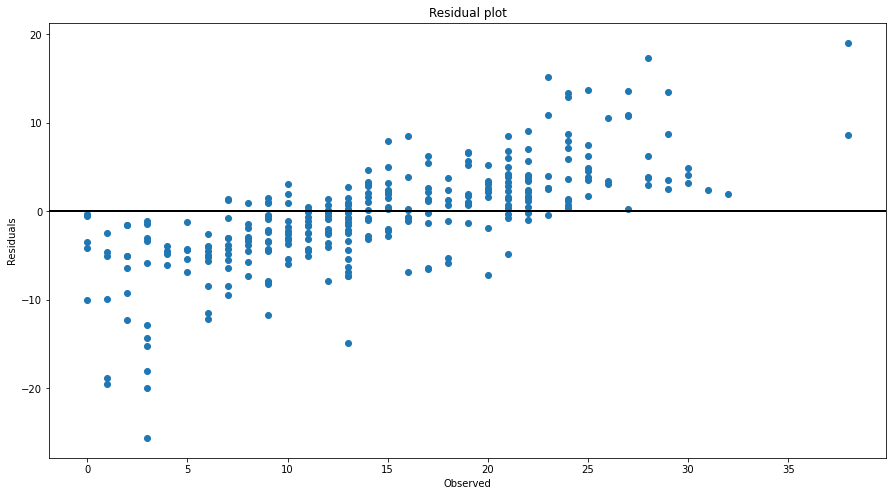

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
residuals=y_test-rf_pred
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error. So, finally random forest model is bset for predicting the bike rental count on daily basis.

In [58]:
Bike_df1=pd.DataFrame(y_test,columns=['y_test'])
Bike_df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)
Bike_predictions

,y_test,rf_pred
0,11,11.64
1,12,12.50
2,3,21.05
3,12,12.88
4,13,17.38
...,...,...
302,9,12.36
303,10,13.22
304,19,13.81
305,19,18.11


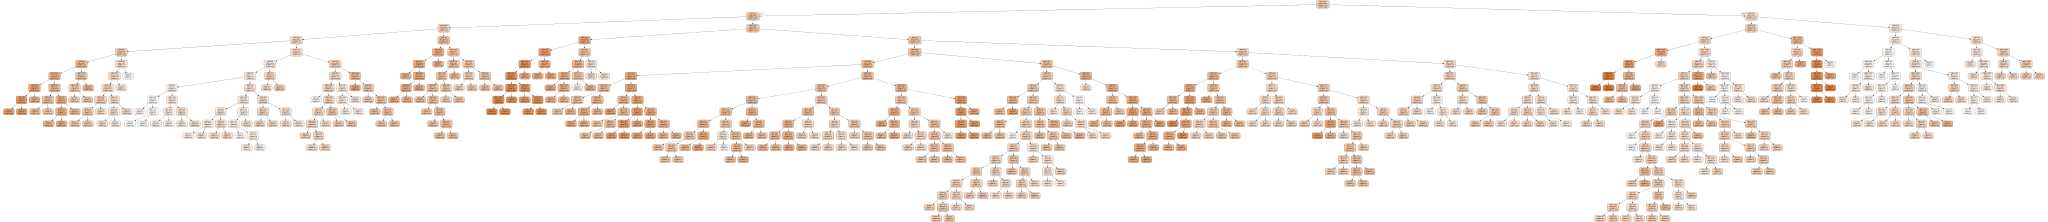

In [59]:
dot_data = tree.export_graphviz(rf.estimators_[5], out_file=None,
                        rounded = True, proportion = False, 
                precision = 2, filled = True) 
graph = graphviz.Source(dot_data) 
graph

## Nearest Neighbors

In [66]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

print(nca_pipe.score(X_test, y_test))


0.2671009771986971


In [74]:
from sklearn.neighbors import NearestCentroid
import numpy as np

clf = NearestCentroid()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
#print(clf.predict(X_test))

0.04560260586319218